In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4376519/pdf/12879_2015_Article_887.pdf

In [3]:
df = pd.read_csv("malaria_drug_params.csv")

In [4]:
df

,Name,PKPD_Model,Drug_Cmax,Drug_Decay_T1,Drug_Decay_T2,Drug_Vd,Drug_PKPD_C50,Drug_Fulltreatment_Doses,Drug_Dose_Interval,Drug_Gametocyte02_Killrate,Drug_Gametocyte34_Killrate,Drug_GametocyteM_Killrate,Drug_Hepatocyte_Killrate,Max_Drug_IRBC_Kill,Drug_Adherence_Rate,Bodyweight_Exponent,Upper_Age_In_Years,Fraction_Of_Adult_Dose
0,Artemether,CONCENTRATION_VERSUS_TIME,114.0,0.120,0.120,1.00,0.60,6,0.5,2.5,1.5,0.7,0.0,8.90000,1,1.00,"[3,6,10]","[0.25,0.5,0.75]"
1,Lumefantrine,CONCENTRATION_VERSUS_TIME,1017.0,1.300,2.000,1.20,280.00,6,0.5,2.4,0.0,0.0,0.0,4.80000,1,0.35,"[3,6,10]","[0.25,0.5,0.75]"
2,DHA,CONCENTRATION_VERSUS_TIME,200.0,0.120,0.120,1.00,0.60,3,1.0,2.5,1.5,0.7,0.0,9.20000,1,1.00,"[.83,2.83,5.25,7.33,9.42]","[0.375,0.5,0.625,0.75,0.875]"
3,Piperaquine,CONCENTRATION_VERSUS_TIME,30.0,0.170,41.000,49.00,5.00,3,1.0,2.3,0.0,0.0,0.0,4.60000,1,0.00,"[.83,2.83,5.25,7.33,9.42]","[0.375,0.5,0.625,0.75,0.875]"
4,Primaquine,CONCENTRATION_VERSUS_TIME,75.0,0.360,0.360,1.00,15.00,1,1.0,2.0,5.0,50.0,0.1,0.00000,1,1.00,"[5,9,14]","[.17,.33,.67]"
5,Chloroquine,CONCENTRATION_VERSUS_TIME,150.0,8.900,244.000,3.90,150.00,3,1.0,0.0,0.0,0.0,0.0,4.80000,1,1.00,"[5,9,14]","[.17,.33,.67]"
6,Artesunate,CONCENTRATION_VERSUS_TIME,200.0,0.120,0.120,1.00,0.03,3,1.0,2.5,1.5,0.7,0.0,4.20000,1,1.00,"[2,5]","[0.167,0.33]"
7,Sulfadoxine,CONCENTRATION_VERSUS_TIME,105.8,8.550,8.550,1.00,0.20,1,1.0,0.0,0.0,0.0,0.0,0.50600,1,1.00,"[2,5]","[0.167,0.33]"
8,Pyrimethamine,CONCENTRATION_VERSUS_TIME,354.1,5.411,5.411,1.00,2.00,1,1.0,0.0,0.0,0.0,0.0,0.60000,1,1.00,"[2,5]","[0.167,0.33]"
9,Amodiaquine,CONCENTRATION_VERSUS_TIME,1185.0,0.120,6.250,2.51,35.50,3,1.0,0.0,0.0,0.0,0.0,0.67089,1,1.00,"[1,5]","[0.22,0.44]"


In [7]:
def get_drug_params(drug):
    df_drug = df[df["Name"]==drug].reset_index(drop=True)
    return df_drug.iloc[0].to_dict()

# PK concentrations

In [68]:
from functools import partial

In [66]:
def drug_concentration(t, drug):
    drug_params = get_drug_params(drug)
    cmax = drug_params["Drug_Cmax"]
    A = drug_params["Drug_Decay_T1"]
    B = drug_params["Drug_Decay_T2"]
    V = drug_params["Drug_Vd"]
    
    # c = cmax * (np.exp(-A*t) + V*np.exp(-B*t))
    c = cmax * (np.exp(-t/A) + V*np.exp(-t/B))
    return c

In [125]:
def plot_drug_concentration_vs_days(drug, tmax_days=100):
    t = np.linspace(0,tmax_days,1000)
    f = np.vectorize(partial(drug_concentration, drug=drug))
    c = f(t)
    
    plt.plot(t,c)
    plt.title(drug)
    plt.xlabel("Time (days)")
    plt.ylabel("Concentration")
    plt.yscale("log")
    plt.ylim([1,5000])

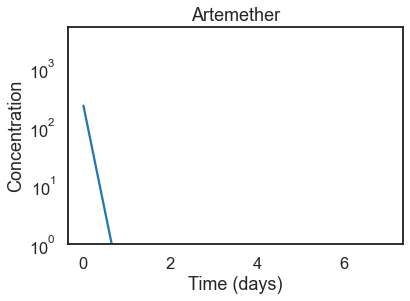

In [126]:
plot_drug_concentration_vs_days("Artemether", tmax_days=7)

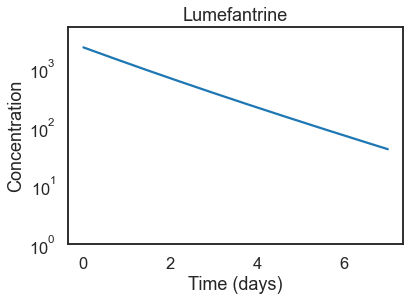

In [127]:
plot_drug_concentration_vs_days("Lumefantrine", tmax_days=7)

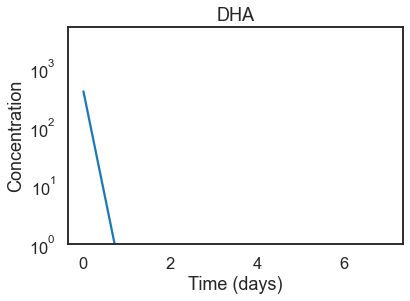

In [128]:
plot_drug_concentration_vs_days("DHA", tmax_days=7)

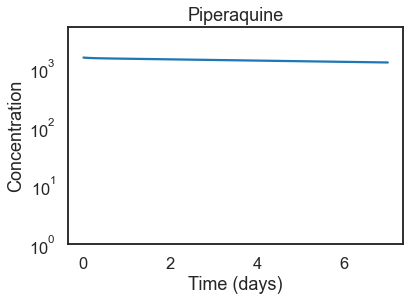

In [129]:
plot_drug_concentration_vs_days("Piperaquine", tmax_days=7)

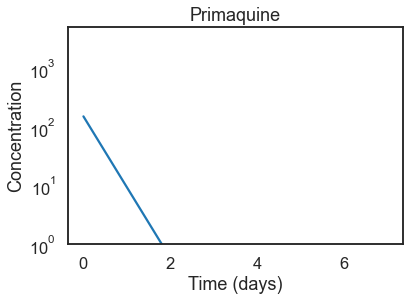

In [130]:
plot_drug_concentration_vs_days("Primaquine", tmax_days=7)

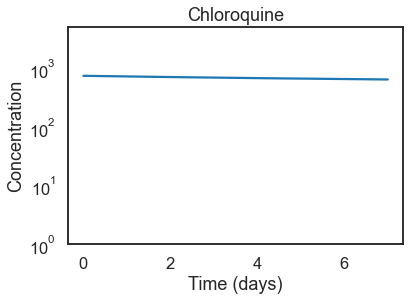

In [131]:
plot_drug_concentration_vs_days("Chloroquine", tmax_days=7)

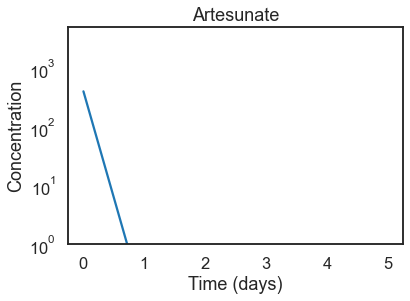

In [132]:
plot_drug_concentration_vs_days("Artesunate", tmax_days=5)

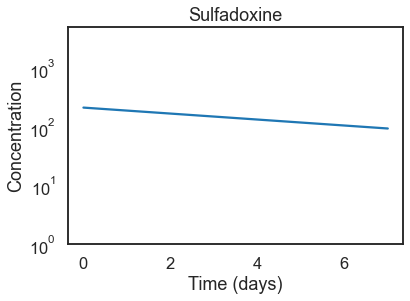

In [133]:
plot_drug_concentration_vs_days("Sulfadoxine", tmax_days=7)

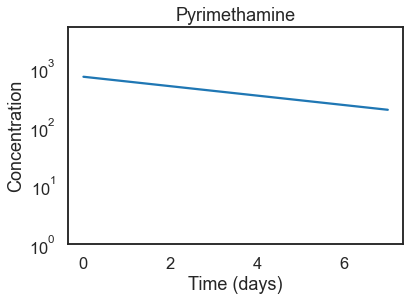

In [134]:
plot_drug_concentration_vs_days("Pyrimethamine", tmax_days=7)

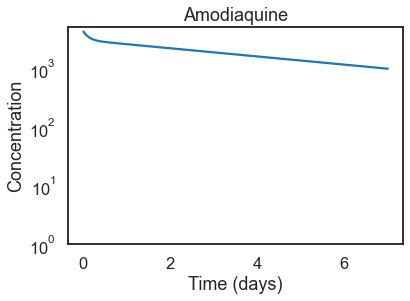

In [135]:
plot_drug_concentration_vs_days("Amodiaquine", tmax_days=7)

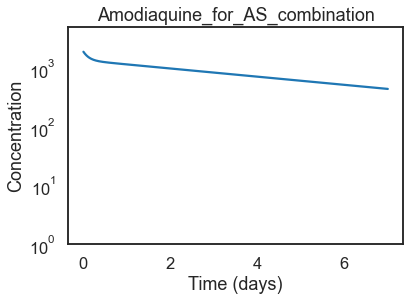

In [136]:
plot_drug_concentration_vs_days("Amodiaquine_for_AS_combination", tmax_days=7)

# PD kill rates

In [15]:
def kill_rate(t, drug, stage="asexual"):
    drug_params = get_drug_params(drug)
    c50 = drug_params["Drug_PKPD_C50"]
    
    if stage == "asexual":
        kmax = drug_params["Max_Drug_IRBC_Kill"]
    elif stage == "sexual":
        kmax = drug_params["Drug_Gametocyte02_Killrate"] + \
        drug_params["Drug_Gametocyte34_Killrate"] + \
        drug_params["Drug_GametocyteM_Killrate"]
    else:
        raise NotImplementedError
        
    c_t = drug_concentration(t, drug)
    
    return kmax * (c_t/(c_t+c50))
    

In [137]:
def plot_kill_rate_vs_days(drug, stage="asexual", tmax_days=100):
    t = np.linspace(0,tmax_days,1000)
    f = np.vectorize(partial(kill_rate, drug=drug, stage=stage))
    c = f(t)
    
    plt.plot(t,c)
    plt.title(drug)
    plt.xlabel("Time (days)")
    plt.ylabel("{} kill rate".format(stage))
    if stage == "asexual":
        plt.ylim([0,9.2])
    elif stage == "sexual":
        plt.ylim([0,60])

## Asexual kill rates (note: y range fixed, x range changes) 

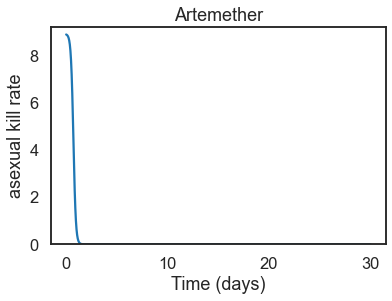

In [138]:
plot_kill_rate_vs_days("Artemether", tmax_days=30)

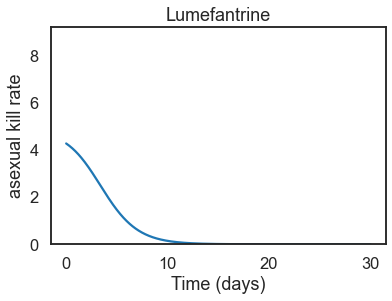

In [139]:
plot_kill_rate_vs_days("Lumefantrine", tmax_days=30)

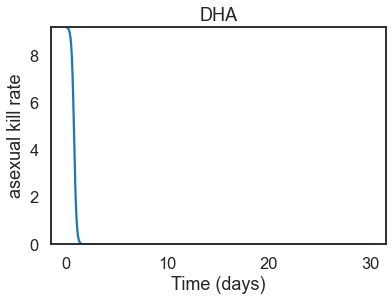

In [140]:
plot_kill_rate_vs_days("DHA", tmax_days=30)

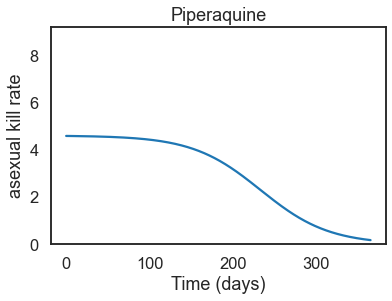

In [141]:
plot_kill_rate_vs_days("Piperaquine", tmax_days=365)

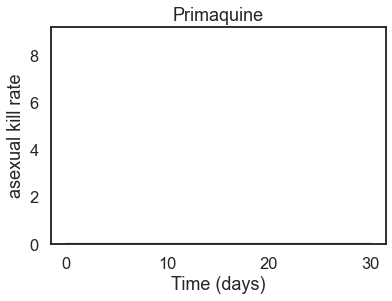

In [142]:
plot_kill_rate_vs_days("Primaquine", tmax_days=30)

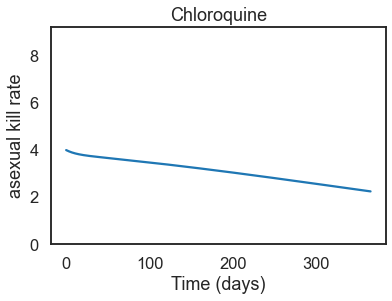

In [146]:
plot_kill_rate_vs_days("Chloroquine", tmax_days=365)

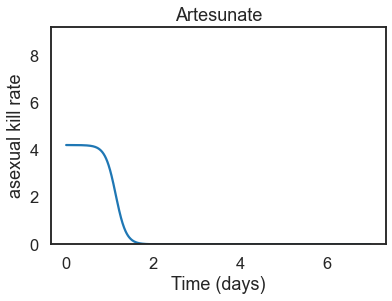

In [147]:
plot_kill_rate_vs_days("Artesunate", tmax_days=7)

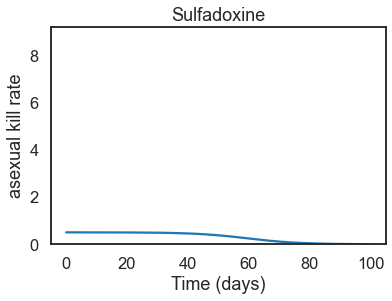

In [153]:
plot_kill_rate_vs_days("Sulfadoxine", tmax_days=100)

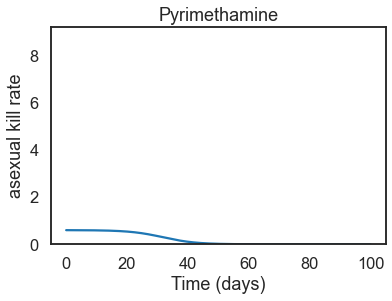

In [152]:
plot_kill_rate_vs_days("Pyrimethamine", tmax_days=100)

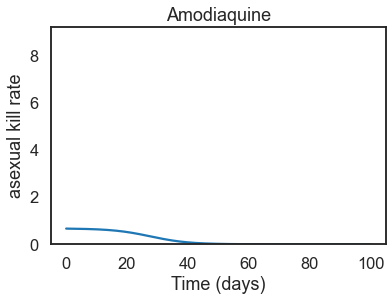

In [154]:
plot_kill_rate_vs_days("Amodiaquine", tmax_days=100)

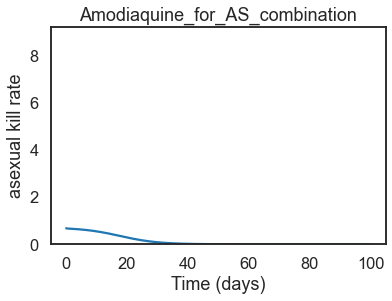

In [155]:
plot_kill_rate_vs_days("Amodiaquine_for_AS_combination", tmax_days=100)

## Sexual kill rates (note: y range fixed, x range changes) 

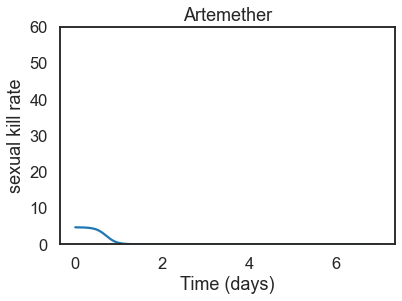

In [157]:
plot_kill_rate_vs_days("Artemether", tmax_days=7, stage="sexual")

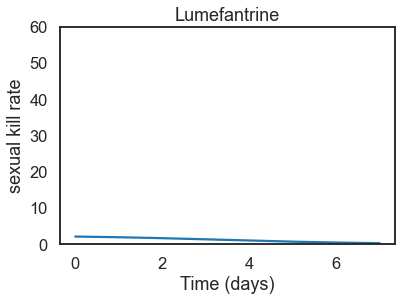

In [160]:
plot_kill_rate_vs_days("Lumefantrine", tmax_days=7, stage="sexual")

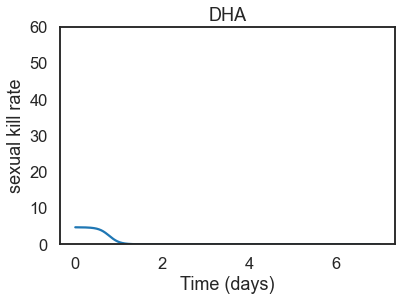

In [161]:
plot_kill_rate_vs_days("DHA", tmax_days=7, stage="sexual")

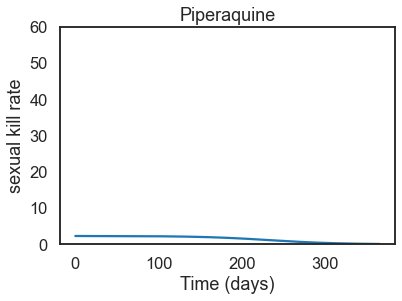

In [163]:
plot_kill_rate_vs_days("Piperaquine", tmax_days=365, stage="sexual")

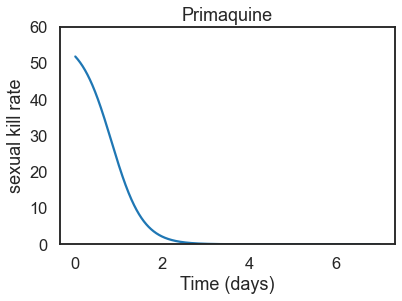

In [165]:
plot_kill_rate_vs_days("Primaquine", tmax_days=7, stage="sexual")

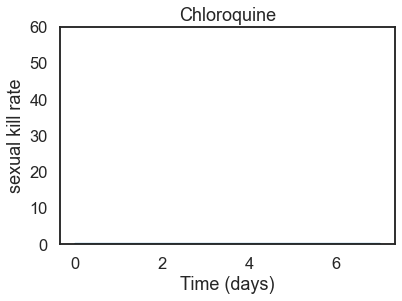

In [167]:
plot_kill_rate_vs_days("Chloroquine", tmax_days=7, stage="sexual")

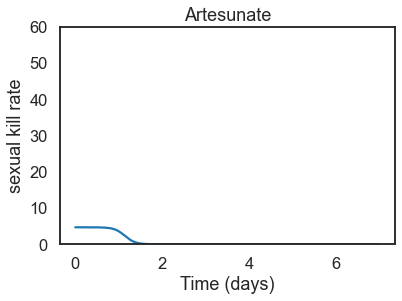

In [168]:
plot_kill_rate_vs_days("Artesunate", tmax_days=7, stage="sexual")

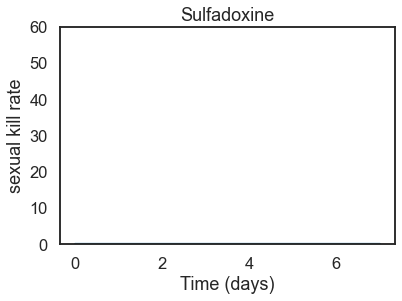

In [170]:
plot_kill_rate_vs_days("Sulfadoxine", tmax_days=7, stage="sexual")

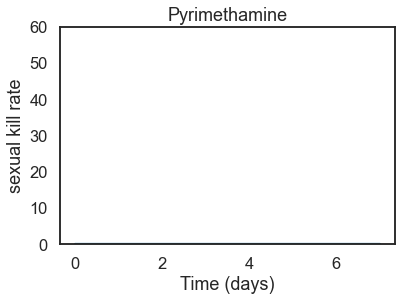

In [171]:
plot_kill_rate_vs_days("Pyrimethamine", tmax_days=7, stage="sexual")

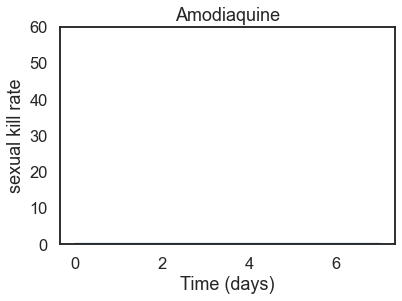

In [172]:
plot_kill_rate_vs_days("Amodiaquine", tmax_days=7, stage="sexual")

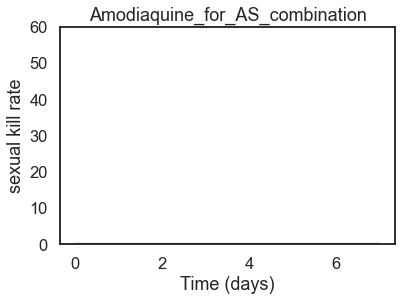

In [173]:
plot_kill_rate_vs_days("Amodiaquine_for_AS_combination", tmax_days=7, stage="sexual")

# Notes

- I had to flip Table 2 in Jaline's paper for A and B to reproduce the plots in Fig 1B.  I think Table 1 was actually listing 1/A and 1/B, in terms of Equation 1 in the paper

I'm seeing some very long-lasting killing rates for certain drugs:
- Because Piperaquine takes a very long time to decay (specifically, a very large decay time in the second term of the PK equation), the asexual kill rate for this drug is about half of the max-kill-rate for DHA for a very long time.  Reduces to 50% of its original killing rate only at about 7 months!!
- Chloroquine, similarly, has a kill rate that only reduces by ~50% after a full year
- Sulfadoxine has a long half-life, with a kill rate that reduces by ~50% after about 2 months